In [19]:
import pandas as pd
df = pd.read_csv("/Users/samf/Desktop/bonn_trips.csv")

In [47]:
df['weekday'].unique()


array([6, 0, 1, 2, 3, 4, 5])

In [21]:
#find rows where 'b_number_start' and b_number_end dont match.

diff_bikes = df.loc[df['b_number_start'] != df['b_number_end']]
diff_bikes.head()

,Unnamed: 0,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,...,month,hour,minute,temperature ¬∞C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry,h3_hex_id


In [51]:
df.head()

,Unnamed: 0,index_start,p_place_type_start,datetime_start,b_number_start,trip_start,p_uid_start,p_bikes_x,latitude_start,longitude_start,...,month,hour,minute,temperature ¬∞C,relative_humidity,precipitaion_level (mm),precipitation y/n,average_wind_speed (m/s),geometry,h3_hex_id
0,0,3,12,2019-01-20 03:20:00,44952,start,12040694,1,50.703284,7.154586,...,1,3,20,-5.6,86,0.0,0,2.4,POINT (7.154585907874099 50.703284257875),891fa11ad13ffff
1,1,25,12,2019-01-20 03:08:00,44931,start,12093216,1,50.747953,7.119311,...,1,3,8,-5.6,86,0.0,0,2.4,POINT (7.1193110416667 50.74795333333299),891fa111553ffff
2,2,75,0,2019-01-20 03:06:00,44594,start,10044445,2,50.736217,7.094604,...,1,3,6,-5.6,86,0.0,0,2.4,POINT (7.0946037769318 50.736217480959),891fa1116b7ffff
3,3,177,12,2019-01-20 03:52:00,44966,start,12069877,1,50.708533,7.105807,...,1,3,52,-5.6,86,0.0,0,2.4,POINT (7.1058066760932 50.70853309380499),891fa11120fffff
4,4,409,12,2019-01-20 03:30:00,44637,start,12098186,1,50.732503,7.097200,...,1,3,30,-5.6,86,0.0,0,2.4,POINT (7.097199722222201 50.732503333333),891fa1116afffff


There are no such rows.

In [22]:
#identify unique value bike values
bikes = df['b_number_start'].unique()
print(len(bikes))
#print(bikes)

996


In [23]:
#convert date times to datetime format
df["datetime_start"] = pd.to_datetime(df["datetime_start"])
df["datetime_end"] = pd.to_datetime(df["datetime_end"])
#by_bike = by_bike.sort('datetime_start')

In [25]:

def average_idle(df):
    #'''calculates the average idle time for a set of trips'''
    
    #convert date times to datetime format
    #df["datetime_start"] = pd.to_datetime(df['datetime_start'])
    #df["datetime_end"] = pd.to_datetime(df['datetime_end'])
    
    import statistics
    
    #groupby bike
    by_bike = df.groupby('b_number_start')
    #by_bike = by_bike.sort('datetime_start')

    all_idle_times = []
    #split by groups   
    for bike in by_bike.groups:
        this_bike = by_bike.get_group(bike)
        this_bike = this_bike.reset_index()

        #loop through each row(trip) and calculate idle time between consecutive trips
        for i in range(len(this_bike.index) - 1): 
            #select end time
            end_time = this_bike.at[i, "datetime_end"]
            #select start time
            start_time = this_bike.at[i + 1, "datetime_start"]
            #calculate idle time
            idle_time = start_time - end_time
            idle_time = idle_time.total_seconds()
            all_idle_times.append(idle_time)

    average = statistics.mean(all_idle_times)
    return average


In [26]:
print(average_idle(df))

22221.386912108777


In [27]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
months = df['month'].unique()
months = np.sort(months)
print(months)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [29]:
by_month = df.groupby('month')
    
    #split by month
allmonths_avg_idle = []
for m in by_month.groups:
    this_month = by_month.get_group(m)
        
    #calculate this month's average idle time
    month_avg_idle = average_idle(this_month)
    allmonths_avg_idle.append(month_avg_idle)

print(allmonths_avg_idle)
       
   
    

[31427.167138810197, 19097.718214389464, 29400.78703629645, 19656.49041004643, 19638.623764583488, 13787.094533162373, 13829.767715833612, 16705.289703647417, 15479.398837902265, 18487.34882617975, 22487.266973379785, 28531.45698033771]


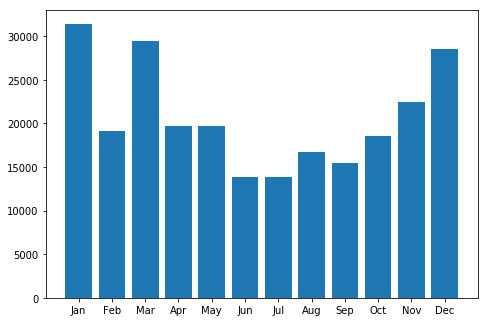

In [30]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.bar(month_names,allmonths_avg_idle)
plt.show()

In [31]:
by_weekday = df.groupby('weekday')
    
    #split by month
allweekday_avg_idle = []
for d in by_weekday.groups:
    this_day = by_weekday.get_group(d)
        
    #calculate this month's average idle time
    day_avg_idle = average_idle(this_day)
    allweekday_avg_idle.append(day_avg_idle)

print(allweekday_avg_idle)

[148346.0302035793, 141281.05715709127, 145715.07404192304, 136413.44539496134, 138212.64993230635, 181574.52333463126, 216602.3543741626]


In [39]:
by_weekend = df.groupby('weekend')
    
    #split by month
allweekend_avg_idle = []
name = []
for d in by_weekend.groups:
    if d == False:
        name.append('Weekday')
    elif d == True:
        name.append('Weekend')
    this_weekend = by_weekend.get_group(d)
        
    #calculate this month's average idle time
    weekend_avg_idle = average_idle(this_weekend)
    allweekend_avg_idle.append(weekend_avg_idle)
print(name)
print(allweekend_avg_idle)

['Weekday', 'Weekend']
[28737.606113119273, 99682.92196030574]


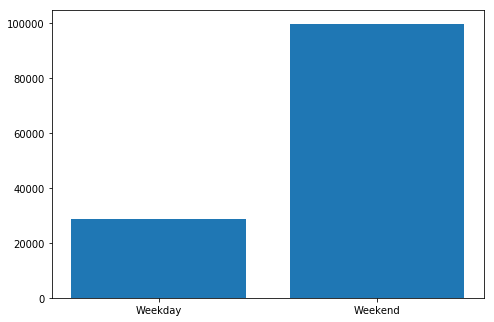

In [40]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name,allweekend_avg_idle)
plt.show()

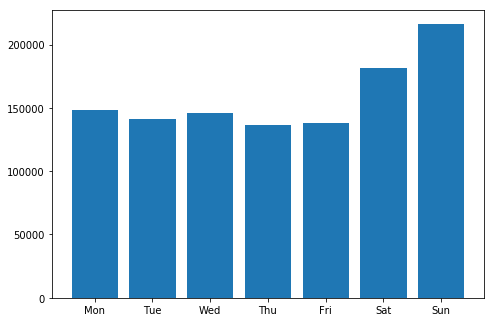

In [50]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax.bar(day_names,allweekday_avg_idle)
plt.show()